# StandardScaler(sklearn)参数详解

## 为什么要归一化
- 归一化后加快了梯度下降求最优解的速度：

  如果机器学习模型使用梯度下降法求最优解时，归一化往往非常有必要，否则很难收敛甚至不能收敛。
    
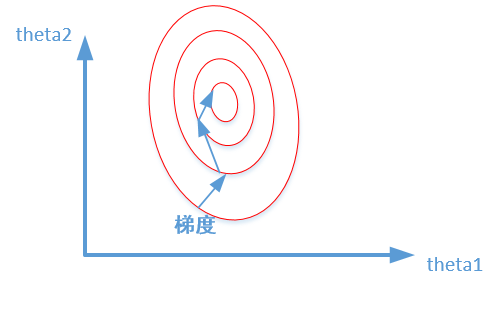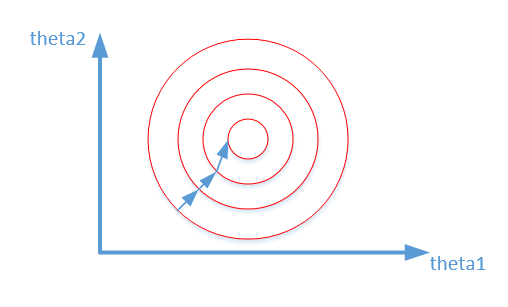
  
  
- 归一化有可能提高精度：

  一些分类器需要计算样本之间的距离（如欧氏距离），例如KNN。如果一个特征值域范围非常大，那么距离计算就主要取决于这个特征，从而与实际情况相悖（比如这时实际情况是值域范围小的特征更重要）。

In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np

StandardScaler()
标准化数据，保证每个维度数据方差为1.均值为0。使得据测结果不会被某些维度过大的特征值而主导。  
$$
x^* = \frac{x - \mu}{\sigma}
$$
- fit

  用于计算训练数据的均值和方差， 后面就会用均值和方差来转换训练数据
- transform

  很显然，它只是进行转换，只是把训练数据转换成标准的正态分布
  
- fit_transform

  不仅计算训练数据的均值和方差，还会基于计算出来的均值和方差来转换训练数据，从而把数据转换成标准的正态分布

In [3]:
    np.random.seed(123)
    print('use sklearn:\n')
    # 注：shape of data: [n_samples, n_features]
    data = np.random.randn(10, 4)
    ss = StandardScaler()
    ss.fit(data)
    trans_data = ss.transform(data)
    # ss.fit_transform(data)
    print('original data: ')
    print(data)
    print('transformed data: ')
    print(trans_data)
    print('scaler info: scaler.mean_: {}, scaler.var_: {}'.format(ss.mean_, ss.var_))
    print('\n')

    print('use numpy by self')
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    var = std * std
    print('mean: {}, std: {}, var: {}'.format(mean, std, var))
    # numpy 的广播功能
    another_trans_data = data - mean
    # 注：是除以标准差
    another_trans_data = another_trans_data / std
    print('another_trans_data: ')
    print(another_trans_data)

use sklearn:

original data: 
[[-1.0856306   0.99734545  0.2829785  -1.50629471]
 [-0.57860025  1.65143654 -2.42667924 -0.42891263]
 [ 1.26593626 -0.8667404  -0.67888615 -0.09470897]
 [ 1.49138963 -0.638902   -0.44398196 -0.43435128]
 [ 2.20593008  2.18678609  1.0040539   0.3861864 ]
 [ 0.73736858  1.49073203 -0.93583387  1.17582904]
 [-1.25388067 -0.6377515   0.9071052  -1.4286807 ]
 [-0.14006872 -0.8617549  -0.25561937 -2.79858911]
 [-1.7715331  -0.69987723  0.92746243 -0.17363568]
 [ 0.00284592  0.68822271 -0.87953634  0.28362732]]
transformed data: 
[[-0.94511643  0.58665507  0.5223171  -0.93064483]
 [-0.53659117  1.16247784 -2.13366794  0.06768082]
 [ 0.9495916  -1.05437488 -0.42049501  0.3773612 ]
 [ 1.13124423 -0.85379954 -0.19024378  0.06264126]
 [ 1.70696485  1.63376764  1.22910949  0.8229693 ]
 [ 0.52371324  1.02100318 -0.67235312  1.55466934]
 [-1.08067913 -0.85278672  1.13408114 -0.858726  ]
 [-0.18325687 -1.04998594 -0.00561227 -2.1281129 ]
 [-1.49776284 -0.9074785   1.154

fit_transform方法是fit和transform的结合，fit_transform(X_train) 意思是找出X_train的和，并应用在X_train上。
  
  这时对于X_test，我们就可以直接使用transform方法。因为此时StandardScaler已经保存了X_train的和。

## 几种归一化的区别
- Zero-mean normalization
  
公式：$ X=(x-\mu)/\sigma $

  这就是均值方差归一化，这样处理后的数据将符合标准正太分布，常用在一些通过距离得出相似度的聚类算法中，比如 K-means。

- Min-max normalization
  
公式： $ X = (x-X_{min})/(x-X_{max}) $

  min-max 归一化的手段是一种线性的归一化方法，它的特点是不会对数据分布产生影响。不过如果你的数据的最大最小值不是稳定的话，你的结果可能因此变得不稳定。min-max 归一化在图像处理上非常常用，因为大部分的像素值范围是 [0, 255]。

- Non-linear normaliztions
  
非线性的归一化函数包含 log，exp，arctan, sigmoid等等。用非线性归一化的函数取决于你的输入数据范围以及你期望的输出范围。比如 log() 函数在 [0, 1] 区间上有很强的区分度，arctan() 可以接收任意实数病转化到
  
区间，sigmoid 接收任意实数并映射到 (0, 1)。

- Length-one normalization
  
公式：$X = \frac{x}{\left\|x\right\|} $

  将特征转为单位向量的形式，可以剔除特征的强度的影响。这种处理用在不考虑向量大小而需要考虑向量方向的问题中，比如在一些文本情感的分类中，我们可能并不需要知道情感表达的强弱，而只要知道情感的类型，比如开心，生气等等。
